In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Tit Coq,1953
1,Grand Old Girl,1935
2,Nemmeno in un sogno,2002
3,Beneath the Skin: Untold Story,2003
4,Sillik,1979


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Othello                 11
Temptation              11
Freedom                 11
The Three Musketeers    11
Vengeance               10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [15]:
t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1201
1936    1141
1938    1138
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

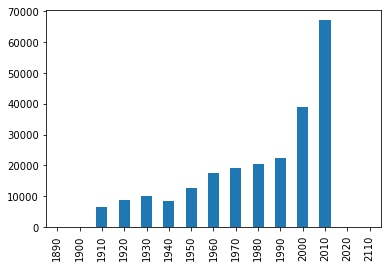

In [18]:
t = titles
(t.year // 10* 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

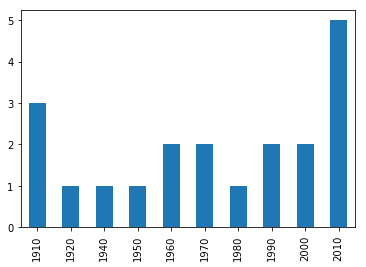

In [29]:
t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

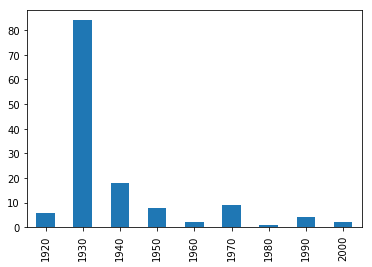

In [30]:
c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

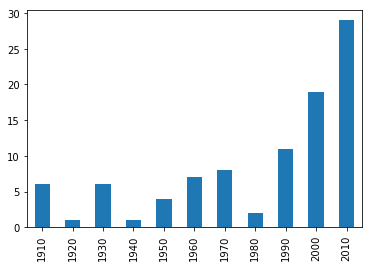

In [31]:
c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [34]:
c = cast
c = c.character.value_counts().head(11)
c

Himself        20500
Dancer         12167
Extra          11279
Reporter        8275
Doctor          7532
Student         7430
Policeman       6956
Party Guest     6905
Nurse           6767
Bartender       6702
Herself         6479
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [36]:
c = cast
c = c[c.character == 'Herself']
c.name.value_counts().head(10)

Queen Elizabeth II    11
Margaret Thatcher      9
Laura (II) M?gica      9
Mary Jo Pehl           9
Joyce Brothers         9
Marina Revilla         8
Estrella Borja         8
In?s J. Southern       8
Marta Berrocal         8
Luisa Horga            7
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [37]:
c = cast
c = c[c.character == 'Himself']
c.name.value_counts().head(10)

Adolf Hitler          100
Richard Nixon          46
Ronald Reagan          41
John F. Kennedy        36
George W. Bush         24
Winston Churchill      23
Ron Jeremy             23
Bill Clinton           22
Martin Luther King     22
Benito Mussolini       22
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [46]:
c = cast
c = c[c.year == 1945]
c.name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     32
Harold Miller       29
Bess Flowers        29
Frank O'Connor      27
Nolan Leary         27
Franklyn Farnum     26
Larry Steers        25
Edmund Cobb         24
Charles Sullivan    24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [47]:
c = cast
c = c[c.year == 1985]
c.name.value_counts().head(10)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Aruna Irani      15
Lou Scheimer     15
Raj Babbar       15
Mohanlal         15
Rajesh Khanna    13
Deven Verma      13
Om Shivpuri      13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

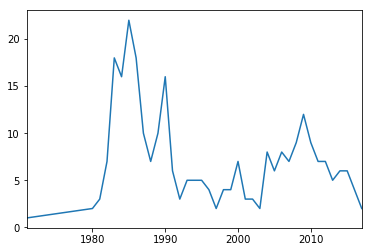

In [51]:
c = cast
c = c[c.name == 'Mammootty']
c.year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [53]:
cast[cast.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in Club                   3
Patron in cabaret                3
Patron in Restaurant             3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [54]:
cast[cast.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Reporter         5
Science Kid              5
Science Promo Cadet      5
Science Club Member      5
Science Fair Kid         4
Science                  4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

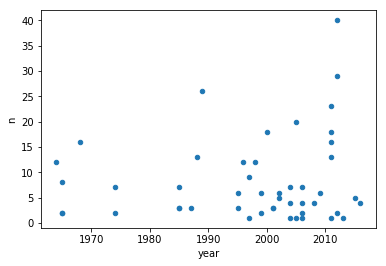

In [56]:
c = cast
c = c[c.name == 'Judi Dench'].sort_values(by='year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind = 'scatter')

### Plot the n-values of Cary Grant's roles through his career.

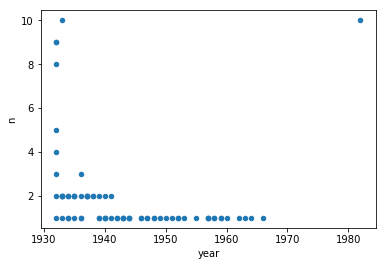

In [61]:
c = cast
c = c[c.name == 'Cary Grant'].sort_values(by='year')
c = c[c.n.notnull()]
c.plot(x ='year', y ='n', kind ='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

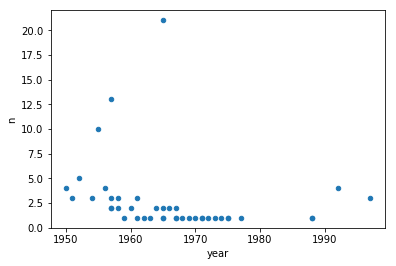

In [62]:
c = cast
c = c[c.name == 'Sidney Poitier'].sort_values(by='year')
c = c[c.n.notnull()]
c.plot(x ='year', y ='n', kind ='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [75]:
c = cast
c = c[c.n == 1]
c = c[c.year // 10 == 195]
c.type.value_counts()

actor      6667
actress    2999
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [76]:
c = cast
c = c[c.n == 2]
c = c[c.year // 10 == 195]
c.type.value_counts()

actor      4602
actress    4594
Name: type, dtype: int64